# import 라이브러리 및 데이터 확인

In [4]:
import pandas as pd

In [5]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [6]:
train.shape

(26457, 20)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [8]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


# 전처리과정

In [9]:
data=pd.concat([train,test],axis=0) #train,test 데이터 합치기 axis=0 행에 기준이 되어

In [10]:
data.isnull().sum() #결측치 찾기

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [11]:
data=data.drop("occyp_type",axis=1) #결측치 제거 ,axis는 로우(열)간 해당 컬럼 제거 ,열이 기준이 되어

In [12]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

In [13]:
train['credit'].isnull().sum()

0

In [14]:
len(data['gender'].unique())

2

In [15]:
unique_len=data.apply(lambda x:len(x.unique())) #모든 컬럼들의 unique한 개수 반환

In [16]:
unique_len

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               4
dtype: int64

In [17]:
group_1=unique_len[unique_len<=2].index #2개 이하
group_1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [18]:
group_2=unique_len[(unique_len>2) & (unique_len<=10)].index #2개 초과 10개 이하
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [19]:
group_3=unique_len[(unique_len>10)].index #10개 초과
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [20]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


In [21]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
data['gender']

0       F
1       F
2       M
3       F
4       F
       ..
9995    F
9996    M
9997    F
9998    F
9999    F
Name: gender, Length: 36457, dtype: object

In [23]:
data['gender']=data['gender'].replace(['F','M'],[0,1])

In [24]:
data['gender']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: gender, Length: 36457, dtype: int64

In [25]:
data['car'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
data['car']=data['car'].replace(['N','Y'],[0,1])

In [27]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,N,1,0,0,0
1,0,0,Y,1,0,0,1
2,1,1,Y,1,0,1,0
3,0,0,Y,1,0,1,0
4,0,1,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,Y,1,1,1,0
9996,1,1,Y,1,1,0,0
9997,0,0,Y,1,0,0,0
9998,0,1,N,1,0,1,0


In [28]:
data['reality'].unique()

array(['N', 'Y'], dtype=object)

In [29]:
data['reality']=data['reality'].replace(['N','Y'],[0,1])

In [30]:
data[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


In [31]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


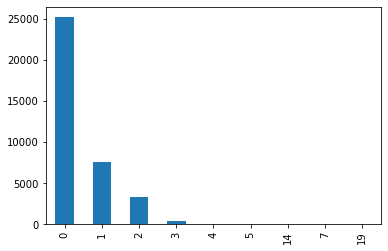

In [32]:
data['child_num'].value_counts().plot.bar()

In [33]:
data.loc[data['child_num']>2,'child_num']=2 #2보다 큰것은 모두 2로 대체

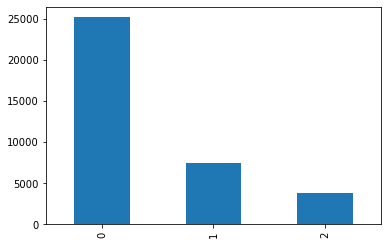

In [34]:
data['child_num'].value_counts().plot.bar()

In [35]:
data[group_2].apply(lambda x:len(x.unique())) # group_2의 unique한 개수를 출력함 

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [36]:
from sklearn import preprocessing #전처리 과정을 자동으로 해주는 라이브러리 선언

In [37]:
label_encoder=preprocessing.LabelEncoder() #라벨 인코더 생성 -문자열변수를 숫자로 자동으로 바꿈

In [38]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [39]:
set(label_encoder.fit_transform(data['income_type'])) # data['income_type']을 피팅해서 라벨숫자로 변환

{0, 1, 2, 3, 4}

In [40]:
data['income_type']=label_encoder.fit_transform(data['income_type']) # data['income_type']을 피팅해서 라벨숫자로 변환
data['edu_type']=label_encoder.fit_transform(data['edu_type'])       # data['edu_type']을 피팅해서 라벨숫자로 변환
data['family_type']=label_encoder.fit_transform(data['family_type']) # data['family_type']을 피팅해서 라벨숫자로 변환
data['house_type']=label_encoder.fit_transform(data['house_type'])   # data['house_type']을 피팅해서 라벨숫자로 변환

In [41]:
data[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


In [42]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [43]:
data['income_total'].min()

27000.0

In [44]:
data['income_total'].max()

1575000.0

In [45]:
len(data['income_total'].unique())

265

In [46]:
import numpy as np

In [47]:
counts,bin_dividers=np.histogram(data['income_total'],bins=7)

In [48]:
data['income_total']

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

In [49]:
data['income_total']=pd.factorize(pd.cut(data['income_total'],bins=bin_dividers,include_lowest=True,labels=[i for i in range(7)]))[0]
# factorize함수를 이용해서 범주형 변수를 숫자로 매핑한다. include_lowest=첫 번째 간격이 포함해야하는지 여부

In [50]:
data['income_total']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: int64

In [51]:
data['DAYS_BIRTH']

0      -13899
1      -11380
2      -19087
3      -15088
4      -15037
        ...  
9995   -18593
9996   -10886
9997   -21016
9998   -16541
9999    -9154
Name: DAYS_BIRTH, Length: 36457, dtype: int64

In [52]:
def make_bin(array,n):
  array =- array
  _,bin_dividers=np.histogram(array,bins=n)
  cut_categories=pd.cut(array,bin_dividers,labels=[i for i in range(n)],include_lowest=True)
  bined_array = pd.factorize(cut_categories)[0]
  return bined_array

In [53]:
pd.Series(make_bin(data['DAYS_BIRTH'],10)).value_counts()

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [54]:
data['DAYS_BIRTH']=make_bin(data['DAYS_BIRTH'],10)
data['DAYS_EMPLOYED']=make_bin(data['DAYS_EMPLOYED'],6)
data['begin_month']=make_bin(data['begin_month'],4)

In [55]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,2
9997,36454,1,8,0,3
9998,36455,0,4,0,2


In [56]:
train.shape

(26457, 20)

In [57]:
test.shape

(10000, 19)

# 예측모델 

In [58]:
test=data[-10000:]

In [59]:
train=data[:-10000]

In [60]:
train_x=train.drop("credit",axis=1)

In [61]:
train_y=train['credit']

In [62]:
test_x=test.drop("credit",axis=1)

In [63]:
train_x.shape

(26457, 18)

In [64]:
train_y.shape

(26457,)

In [65]:
test_x.shape

(10000, 18)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf=RandomForestClassifier() #랜덤포레스트분류기 객체 생성

In [68]:
clf.fit(train_x,train_y) #데이터 학습시키기

RandomForestClassifier()

In [69]:
train_proba=clf.predict_proba(train_x) #predict_proba  불확실성을 추정할 수 있는 함수

In [70]:
train_proba[:10] #3개의 클래스의 예측확률

array([[0.1 , 0.66, 0.24],
       [0.07, 0.69, 0.24],
       [0.03, 0.08, 0.89],
       [0.7 , 0.1 , 0.2 ],
       [0.1 , 0.01, 0.89],
       [0.1 , 0.67, 0.23],
       [0.09, 0.05, 0.86],
       [0.64, 0.08, 0.28],
       [0.06, 0.02, 0.92],
       [0.06, 0.1 , 0.84]])

In [71]:
np.argmax(train_proba,axis=1)[:10] #최대값의 index 위치

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2], dtype=int64)

In [72]:
sample_submission.iloc[:,1:]=clf.predict_proba(test_x)

In [73]:
sample_submission

,index,0,1,2
0,26457,0.07,0.14,0.79
1,26458,0.09,0.32,0.59
2,26459,0.04,0.16,0.80
3,26460,0.13,0.23,0.64
4,26461,0.08,0.37,0.55
...,...,...,...,...
9995,36452,0.15,0.41,0.44
9996,36453,0.13,0.28,0.59
9997,36454,0.04,0.17,0.79
9998,36455,0.09,0.42,0.49


In [74]:
sample_submission.to_csv("sample_submission_ver1.csv",index=False)

In [75]:
from sklearn.model_selection import train_test_split #test,train 분리

In [76]:
X_train,X_val,y_train,y_val=train_test_split(train_x,train_y,stratify=train_y,test_size=0.25,random_state=10086)

In [77]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(19842, 18) (6615, 18) (19842,) (6615,)


In [78]:
clf=RandomForestClassifier()

In [79]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_proba=clf.predict_proba(X_val)

In [1]:
y_val

NameError: name 'y_val' is not defined

In [81]:
y_val_onehot=pd.get_dummies(y_val)

In [82]:
y_proba

array([[0.07, 0.52, 0.41],
       [0.01, 0.15, 0.84],
       [0.16, 0.06, 0.78],
       ...,
       [0.1 , 0.07, 0.83],
       [0.02, 0.25, 0.73],
       [0.08, 0.23, 0.69]])

In [83]:
y_val_onehot

,0.0,1.0,2.0
36,0,0,1
3464,0,0,1
2640,0,0,1
22500,0,1,0
17275,0,1,0
...,...,...,...
6806,0,1,0
23096,0,0,1
7756,0,0,1
23331,0,0,1


In [84]:
from sklearn.metrics import log_loss #평가산식 = 모델 성능 평가 시 사용가능한 지표, 분류 모델평가시 사용,https://dacon.io/competitions/open/235573/talkboard/400274

In [85]:
log_loss(y_val_onehot,y_proba)

1.086497324104555

In [86]:
from sklearn.model_selection import StratifiedKFold #모델을 학습시킬 때 편향되지 않게 학습

In [87]:
folds=StratifiedKFold(n_splits=5,shuffle=True,random_state=55) #각 fold 안의 데이터셋의 label 분포가 전체 데이터셋의 label 분포를 따름

In [88]:
outcomes = []
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)
    
np.mean(outcomes)

1.0522831563301938

In [89]:
np.mean(outcomes)

1.0522831563301938

In [90]:
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    sub += clf.predict_proba(test_x)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5

np.mean(outcomes)

1.0635446145753555

In [91]:
sub

array([[0.118, 0.196, 0.686],
       [0.06 , 0.304, 0.636],
       [0.066, 0.236, 0.698],
       ...,
       [0.082, 0.164, 0.754],
       [0.078, 0.408, 0.514],
       [0.082, 0.4  , 0.518]])

In [92]:
sample_submission.iloc[:,1:] =  sub

In [93]:
sample_submission.to_csv("5fold_prediction.csv", index = False)